<a href="https://colab.research.google.com/github/hadeyema/playground-6psrqy2u/blob/master/projet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projet2 DS Openclassroom

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

idx  = pd.IndexSlice

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns;
import os
import csv;


import re
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from IPython.display import Image
import scipy.stats as st

# `**Chargement des Tables **`

Eliminer les colonnes "Unamed" en fin de chaque tableau

In [7]:
dta = pd.read_csv("/content/EdStatsData.csv").dropna(how='all', axis='columns')
cntry = pd.read_csv("/content/EdStatsCountry.csv").dropna(how='all', axis='columns')
cnt_series = pd.read_csv("/content/EdStatsCountry-Series.csv").dropna(how='all', axis='columns')
series = pd.read_csv("/content/EdStatsSeries.csv").dropna(how='all', axis='columns')
footnote = pd.read_csv("/content/EdStatsFootNote.csv").dropna(how='all', axis='columns')

**Exploration des donnees **

In [8]:
dta.sample(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
134031,Austria,AUT,PIAAC: Adults by numeracy proficiency level (%...,LO.PIAAC.NUM.BE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.401461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
387561,Guinea,GIN,SABER: (School Autonomy Accountability) Policy...,SABER.SCH.ATNM.GOAL3.LVL2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403808,"Hong Kong SAR, China",HKG,DHS: Typology of out-of-school children. Prima...,HH.DHS.OOST.L.U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
dta.shape

(886930, 69)

In [10]:
cntry.shape

(241, 31)

In [11]:
cnt_series.shape

(613, 3)

In [12]:
series.shape

(3665, 15)

In [13]:
footnote.shape

(643638, 4)

**Donnees** **manquantes**

In [14]:
dta.isnull().sum().sort_values(ascending=False)

2017              886787
2016              870470
1971              851393
1973              851385
1972              851311
1974              851200
1979              850121
1976              849447
1982              849419
1989              849390
1977              849356
1978              849354
1983              848470
1988              848378
1984              848324
1987              848289
1981              848153
1986              847558
2095              835494
2100              835494
2055              835494
2065              835494
2040              835494
2045              835494
2050              835494
2025              835494
2035              835494
2060              835494
2020              835494
2030              835494
2070              835494
2075              835494
2080              835494
2085              835494
2090              835494
1970              814642
1997              813477
1991              812493
1992              811387
1993              811137


In [15]:
dta.isnull().sum().sort_values(ascending=False)

2017              886787
2016              870470
1971              851393
1973              851385
1972              851311
1974              851200
1979              850121
1976              849447
1982              849419
1989              849390
1977              849356
1978              849354
1983              848470
1988              848378
1984              848324
1987              848289
1981              848153
1986              847558
2095              835494
2100              835494
2055              835494
2065              835494
2040              835494
2045              835494
2050              835494
2025              835494
2035              835494
2060              835494
2020              835494
2030              835494
2070              835494
2075              835494
2080              835494
2085              835494
2090              835494
1970              814642
1997              813477
1991              812493
1992              811387
1993              811137


In [16]:
dta.isnull().sum().sort_values(ascending=False)

2017              886787
2016              870470
1971              851393
1973              851385
1972              851311
1974              851200
1979              850121
1976              849447
1982              849419
1989              849390
1977              849356
1978              849354
1983              848470
1988              848378
1984              848324
1987              848289
1981              848153
1986              847558
2095              835494
2100              835494
2055              835494
2065              835494
2040              835494
2045              835494
2050              835494
2025              835494
2035              835494
2060              835494
2020              835494
2030              835494
2070              835494
2075              835494
2080              835494
2085              835494
2090              835494
1970              814642
1997              813477
1991              812493
1992              811387
1993              811137


In [17]:
cnt_series.isnull().sum().sort_values(ascending=False)

DESCRIPTION    0
SeriesCode     0
CountryCode    0
dtype: int64

In [18]:
footnote.isnull().sum().sort_values(ascending=False)

DESCRIPTION    0
Year           0
SeriesCode     0
CountryCode    0
dtype: int64

In [19]:
# Faire une copie des Dataframes 
dta1 = dta.copy()
cntry1 = cntry.copy()
series1 = series.copy()
cnt_ser1 = cnt_series.copy()
footnote1 = footnote.copy()

In [79]:
#Moyenne par decennies
dta1['1970s'] = dta[[str(year) for year in range(1970,1980,1)]].mean(1)
dta1['1980s'] = dta1[[str(year) for year in range(1980,1990,1)]].mean(1)
dta1['1990s'] = dta1[[str(year) for year in range(1990,2000,1)]].mean(1)
dta1['2000s'] = dta1[[str(year) for year in range(2000,2010,1)]].mean(1)
dta1['2010s'] = dta1[[str(year) for year in [2010,2011,2012,2013,2014,2015,2016,2017]]].mean(1)
dta1['2020s'] = dta1[[str(year) for year in [2020,2025]]].mean(1)
dta1['2030s'] = dta1[[str(year) for year in [2030,2035]]].mean(1)
dta1['2040s'] = dta1[[str(year) for year in [2040,2045]]].mean(1)
dta1['2050s'] = dta1[[str(year) for year in [2050,2055]]].mean(1)
dta1['2060s'] = dta1[[str(year) for year in [2060,2065]]].mean(1)
dta1['2070s'] = dta1[[str(year) for year in [2070,2075]]].mean(1)
dta1['2080s'] = dta1[[str(year) for year in [2080,2085]]].mean(1)
dta1['2090s'] = dta1[[str(year) for year in [2090,2095]]].mean(1)
dta1['2100s'] = dta1[[str(2100)]].mean(1)

In [20]:
def desc_bis (df):
    nb_li = df.index.size
    nb_col = df.columns.size
    tot = nb_li*nb_col    
    infos = pd.DataFrame(df.dtypes).T.rename(index={0:'Type'}) 
    infos = infos.append(pd.DataFrame(df.isna().sum()).T.rename(index={0:'null'}))
    return infos

In [21]:
def infos (df):
    nb_li = df.shape[0]
    nb_co = df.shape[1]
    t = np.empty(nb_li)
    t.fill(nb_li)
    df_l_null = pd.DataFrame(df.T.isna().sum()) 
    df_c_null = pd.DataFrame(df.isna().sum()) 

  # nbe de lignes sans 'null'
    al = len([x for x in df_l_null[0] if x==0])
    nb_ss_null = pd.DataFrame([al]).rename(index={0:'lign_ss_null'}).T
    pct_ss_null = pd.DataFrame([al*100/nb_li]).rename(index={0:'lign_ss_null'}).T
    # nbe de lignes 'null'
    bl = len([x for x in df_l_null[0] if x==nb_co])
    nb_null = pd.DataFrame([bl]).rename(index={0:'lign_null'}).T
    pct_null = pd.DataFrame([bl*100/nb_li]).rename(index={0:'lign_null'}).T
    # nbe de lignes mixtes
    cl = len([x for x in df_l_null[0] if (x!=0 and x!=nb_co)])
    nb_mix = pd.DataFrame([cl]).rename(index={0:'lign_mix'}).T
    pct_mix = pd.DataFrame([cl*100/nb_li]).rename(index={0:'lign_mix'}).T
    infos_nb = pd.concat([nb_ss_null, nb_null, nb_mix],axis=1, sort=False).rename(index={0:'nb'})
    infos_pct = pd.concat([pct_ss_null, pct_null, pct_mix],axis=1, sort=False).rename(index={0:'pct'})
    infos_l = pd.concat([infos_nb,infos_pct], sort=False)
    # nbe de lignes total
    infos_l["lign_tot"] = [infos_l.T['nb'].sum(), infos_l.T['pct'].sum()]

    # nbe de colonnes sans 'null'
    ac = len([x for x in df_c_null[0] if x==0])
    nb_ss_null = pd.DataFrame([ac]).rename(index={0:'col_ss_null'}).T
    pct_ss_null = pd.DataFrame([ac*100/nb_co]).rename(index={0:'col_ss_null'}).T
    # nbe de colonnes 'null'
    bc = len([x for x in df_c_null[0] if x==nb_li])
    nb_null = pd.DataFrame([bc]).rename(index={0:'col_null'}).T
    pct_null = pd.DataFrame([bc*100/nb_co]).rename(index={0:'col_null'}).T
    # nbe de colonnes mixtes
    cc = len([x for x in df_c_null[0] if (x!=0 and x!=nb_li)])
    nb_mix = pd.DataFrame([cc]).rename(index={0:'col_mix'}).T
    pct_mix = pd.DataFrame([cc*100/nb_co]).rename(index={0:'col_mix'}).T
    infos_nb = pd.concat([nb_ss_null, nb_null, nb_mix],axis=1, sort=False).rename(index={0:'nb'})
    infos_pct = pd.concat([pct_ss_null, pct_null, pct_mix],axis=1, sort=False).rename(index={0:'pct'})
    infos_c = pd.concat([infos_nb,infos_pct], sort=False)
    # nbe de lignes total
    infos_c["col_tot"] = [infos_c.T['nb'].sum(), infos_c.T['pct'].sum()]

    infos = pd.concat([infos_l,infos_c], axis=1, sort=False)
    
    return infos

In [22]:
## FONCTION DE COMPTAGE DES VALEURS NULLES
def evalNull (inf_df):
    a = inf_df.T['null'].sum()
    b = inf_df.T['count'].sum()
    print("Nbe valeurs 'null' : {:.0f}".format(a))
    print("Nbe valeurs non 'null' : {:.0f}".format(b))
    print("Nbe total cases : {:.0f}".format(a+b))
    print("% total valeurs 'null' : {:.1f}%".format(a*100/(a+b)))

In [23]:
# COMPTAGE DES 'NA' par LIGNES et par COLONNES (toutes les tables)
infos_na = pd.concat([infos(dta), infos(cntry), infos(series),\
                  infos(cnt_series), infos(footnote)], axis = 0,\
                 keys=['data', 'cntry', 'series', 'cnt_series', 'footnote'])
pd.options.display.float_format = '{:.1f}'.format
infos_na

lign_ss_null  lign_null  lign_mix  lign_tot  col_ss_null  col_null  col_mix  col_tot
data       nb            0.0        0.0  886930.0  886930.0          4.0       0.0     65.0     69.0
           pct           0.0        0.0     100.0     100.0          5.8       0.0     94.2    100.0
cntry      nb            0.0        0.0     241.0     241.0          4.0       0.0     27.0     31.0
           pct           0.0        0.0     100.0     100.0         12.9       0.0     87.1    100.0
series     nb            0.0        0.0    3665.0    3665.0          5.0       0.0     10.0     15.0
           pct           0.0        0.0     100.0     100.0         33.3       0.0     66.7    100.0
cnt_series nb          613.0        0.0       0.0     613.0          3.0       0.0      0.0      3.0
           pct         100.0        0.0       0.0     100.0        100.0       0.0      0.0    100.0
footnote   nb       643638.0        0.0       0.0  643638.0          4.0       0.0      0.0      4.0
           pct         100.0        0.0       0.0     100.0        100.0       0.0      0.0    100.0

In [24]:
#TABLE DATA
info_data = desc_bis(dta).append(dta.describe(include='all'))
evalNull(info_data)
info_data

Nbe valeurs 'null' : 52568249
Nbe valeurs non 'null' : 8629921
Nbe total cases : 61198170
% total valeurs 'null' : 85.9%


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
Type,object,object,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
null,0,0,0,0,814642,851393,851311,851385,851200,799624,849447,849356,849354,850121,797808,848153,849419,848470,848324,796634,847558,848289,848378,849390,762525,812493,811387,811137,809468,755569,810123,813477,802016,768091,710254,763421,762725,756567,758116,702822,746618,749658,752543,744822,644488,740918,739666,749421,773141,755872,870470,886787,835494,835494,835494,835494,835494,835494,835494,835494,835494,835494,835494,835494,835494,835494,835494,835494,835494
count,886930,886930,886930,886930,72288.0,35537.0,35619.0,35545.0,35730.0,87306.0,37483.0,37574.0,37576.0,36809.0,89122.0,38777.0,37511.0,38460.0,38606.0,90296.0,39372.0,38641.0,38552.0,37540.0,124405.0,74437.0,75543.0,75793.0,77462.0,131361.0,76807.0,73453.0,84914.0,118839.0,176676.0,123509.0,124205.0,130363.0,128814.0,184108.0,140312.0,137272.0,134387.0,142108.0,242442.0,146012.0,147264.0,137509.0,113789.0,131058.0,16460.0,143.0,51436.0,51436.0,51436.0,51436.0,51436.0,51436.0,51436.0,51436.0,51436.0,51436.0,51436.0,51436.0,51436.0,51436.0,51436.0,51436.0,51436.0
unique,242,242,3665,3665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Isle of Man,LAO,EGRA: Listening Comprehension - Share of stude...,PRJ.POP.ALL.4.FE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3665,3665,242,242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1974772449.6,4253638470.2,4592364905.3,5105005610.9,5401492903.4,2314287511.6,5731808142.1,6124437154.2,6671488719.0,7436723955.0,3283897508.6,7664969392.5,7913721582.3,7856908292.0,8118001691.3,3622763069.6,9156550107.9,10149008176.4,11047093700.6,11954359464.5,9084423550.7,15716740023.5,16046684980.9,16435324911.6,16840220344.1,10525426793.2,18746300978.4,20273850045.0,17946782924.0,13315578553.5,9423383683.8,13848674153.9,14282985240.2,14493931504.0,15897290510.7,11886369143.0,16846738101.8,18723002078.7,20297938641.7,18949069733.0,11895924324.6,21179108774.0,21763227127.6,24253320032.2,26784486485.5,23537199876.5,193441064053.0,2.2,578.1,605.5,631.6,655.7,675.2,691.1,704.1,714.6,722.5,727.1,728.4,726.6,722.8,717.7,711.3,703.4,694.0
std,NaN,NaN,NaN,NaN,121168685352.0,180481446225.2,191408271479.8,205917043980.7,211214985371.1,137505922744.8,221554619977.1,232548901067.3,247398632281.3,266095745106.0,178077355006.1,274414168518.6,279054890539.2,282380912099.2,294063483007.3,200292918507.1,326467474653.7,353535110136.2,380425690032.6,401487301933.0,366566685061.6,488135688

In [25]:
#TABLE COUNTRY
info_country = desc_bis(cntry).append(cntry.describe(include='all'))
evalNull(info_country)
info_country

Nbe valeurs 'null' : 2113
Nbe valeurs non 'null' : 5358
Nbe total cases : 7471
% total valeurs 'null' : 28.3%


,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
Type,object,object,object,object,object,object,object,object,object,object,object,float64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,object
null,0,0,0,0,3,26,96,27,27,1,36,209,44,97,183,26,194,96,60,117,41,80,60,28,100,81,130,99,134,56,62
count,241,241,241,241,238,215,145,214,214,240,205,32.0,197,144,58,215,47,145,181,124,200,161,181,213,141,160,111,142,107.0,185.0,179
unique,241,241,241,241,238,152,131,7,5,240,43,NaN,2,3,2,3,32,3,1,3,2,2,2,27,60,75,2,35,NaN,NaN,20
top,XKX,Nigeria,Nigeria,United Kingdom of Great Britain and Northern I...,TM,Euro,April 2012 database update: Based on official ...,Europe & Central Asia,Upper middle income,TM,2005,NaN,Value added at basic prices (VAB),IBRD,HIPC,Country uses the 1993 System of National Accou...,1990–95,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2013","Integrated household survey (IHS), 2012",Yes,2010,NaN,NaN,2005
freq,1,1,1,1,1,23,6,57,55,1,34,NaN,163,67,40,165,8,98,181,107,106,95,110,59,10,15,110,36,NaN,NaN,40
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.1,2011.0,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6,2.6,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1987.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,1995.0,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.5,2011.0,NaN


In [26]:
#TABLE SERIES
info_series = desc_bis(series).append(series.describe(include='all'))
evalNull(info_series)
info_series

Nbe valeurs 'null' : 33213
Nbe valeurs non 'null' : 21762
Nbe total cases : 54975
% total valeurs 'null' : 60.4%


,Series Code,Topic,Indicator Name,Short definition,Long definition,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,General comments,Source,Statistical concept and methodology,Development relevance,Related source links
Type,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
null,0,0,0,1509,0,3566,3351,3113,3618,3651,3651,0,3642,3662,3450
count,3665,3665,3665,2156,3665,99,314,552,47,14,14,3665,23,3,215
unique,3665,37,3665,1169,2060,1,4,14,3,9,8,31,2,1,1
top,UIS.AFR.SCHBSP.1.PU.WPOWAT,Learning Outcomes,Theoretical duration of secondary education (y...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Annual,Projections (2010 to 2100),EGRA,Weighted average,Data should be used cautiously because of diff...,When NEET rates are available for more than tw...,UNESCO Institute for Statistics,TIMSS,Unemployment and total employment are the broa...,http://saber.worldbank.org/index.cfm
freq,1,1046,1,215,215,99,308,403,31,3,3,1269,20,3,215


In [27]:
#TABLE CONUNTRY-SERIES
inf_cntSer = desc_bis(cnt_series).append(cnt_series.describe(include='all'))
evalNull(inf_cntSer)
inf_cntSer

Nbe valeurs 'null' : 0
Nbe valeurs non 'null' : 1839
Nbe total cases : 1839
% total valeurs 'null' : 0.0%


,CountryCode,SeriesCode,DESCRIPTION
Type,object,object,object
null,0,0,0
count,613,613,613
unique,211,21,97
top,MDA,SP.POP.GROW,Data sources : United Nations World Population...
freq,18,211,154


In [28]:
#TABLE FOOTNOTE
info_footnote = desc_bis(footnote).append(footnote.describe(include='all'))
evalNull(info_footnote)
info_footnote

Nbe valeurs 'null' : 0
Nbe valeurs non 'null' : 2574552
Nbe total cases : 2574552
% total valeurs 'null' : 0.0%


,CountryCode,SeriesCode,Year,DESCRIPTION
Type,object,object,object,object
null,0,0,0,0
count,643638,643638,643638,643638
unique,239,1558,56,9102
top,LIC,SH.DYN.MORT,YR2004,Country Data
freq,7320,9226,27128,191188


In [29]:
# Fonction vérifiant l'unicité des lignes d'une liste 
def uniCle (t_tab): 
    if isinstance(t_tab[0], type(str)) :
        uni = list(set(t_tab))
        res = True if (len(uni)==len(t_tab)) else False
    else :
        uni = list(set(zip(*t_tab))) # liste des combinaisons uniques
        resultat = True if (len(uni)==len(t_tab[0])) else False
    return resultat

In [30]:
print("Table Data : Unicité de la clé ('Country Code'&'Indicator Code') {}"\
      .format(uniCle([dta["Country Code"], dta["Indicator Code"]])))
print("Table Country : Unicité de la clé ('Country Code') {}"\
      .format(uniCle(cntry["Country Code"])))
print("Table Series : Unicité de la clé ('Series Code') {}"\
      .format(uniCle(series["Series Code"])))
print("Table Country-Series : Unicité de la clé ('CountryCode'&'SeriesCode') {}"\
      .format(uniCle([cnt_series["CountryCode"], cnt_series["SeriesCode"]])))
print("Table FootNote : Unicité de la clé ('CountryCode'&'SeriesCode'&'Year') {}"\
      .format(uniCle([footnote["CountryCode"],footnote["SeriesCode"],footnote["Year"]])))

Table Data : Unicité de la clé ('Country Code'&'Indicator Code') True
Table Country : Unicité de la clé ('Country Code') True
Table Series : Unicité de la clé ('Series Code') False
Table Country-Series : Unicité de la clé ('CountryCode'&'SeriesCode') True
Table FootNote : Unicité de la clé ('CountryCode'&'SeriesCode'&'Year') True


In [31]:
# Liste des pays
cntry.shape

(241, 31)

Liste des zones

In [32]:
zones = ['Arab World',
         'East Asia & Pacific',
         'East Asia & Pacific (excluding high income)',
         'East Asia & Pacific (developing only)',
         'East Asia & Pacific (all income levels)',
         'Euro area',
         'European Union'
         'Europe & Centraµl Asia',
         'Europe & Central Asia (excluding high income)',
         'Europe & Central Asia (developing only)',
         'Europe & Central Asia (all income levels)',
         'European Union',
         'Heavily indebted poor countries (HIPC)',
         'High income',
         'Latin America & Caribbean',
         'Latin America & Caribbean (developing only)',
         'Latin America & Caribbean (excluding high income)',
         'Latin America & Caribbean (all income levels)',
         'Least developed countries: UN classification',
         'Low & middle income',
         'Low income',
         'Lower middle income',
         'Middle East & North Africa',
         'Middle East & North Africa (excluding high income)',
         'Middle East & North Africa (all income levels)',
         'Middle East & North Africa (developing only)',
         'Middle income',
         'North America',
         'OECD members',
         'South Asia',
         'Sub-Saharan Africa',
         'Sub-Saharan Africa (excluding high income)',
         'Sub-Saharan Africa (developing only)',
         'Sub-Saharan Africa (all income levels)',
         'Upper middle income',
         'World',
        ]

Liste des pays sans les zones

In [33]:
country = cntry[~cntry['Short Name'].isin(zones)]['Short Name'].unique()
country.shape

(216,)

In [34]:
country

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'The Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei', 'Bhutan', 'Botswana', 'Central African Republic',
       'Canada', 'Switzerland', 'Channel Islands', 'Chile', 'China',
       "Côte d'Ivoire", 'Cameroon', 'Dem. Rep. Congo', 'Congo',
       'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba',
       'Curaçao', 'Cayman Islands', 'Cyprus', 'Czech Republic', 'Germany',
       'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia',
       'Finland', 'Fiji', 'France', 'Faeroe Islands', 'Micronesia',
       'Gabon', 'United Kingdom

In [35]:
data = dta[~dta['Country Name'].isin(zones)]['Country Name'].unique()
data.shape

(218,)

Le nombre de pays dans la table Data (216) et cntry (218) sont differents , verifions les pays manquants 

In [36]:
# Fonction qui trouve les éléments uniques différents dans deux tableaux
def Diff(tab1, tab2): 
    return (set(tab1)-set(tab2),set(tab2)-set(tab1)) # renvoie deux tableaux spécifiques à tab1 puis tab2

In [37]:
country_diff = Diff(list(dta["Country Code"].unique()),list(cntry["Country Code"].unique()))
print("Codes des pays spécifiques à 'Data' : {}"\
  .format(country_diff[0]))
print("Codes des pays spécifiques à 'Country' : {}"\
  .format(country_diff[1]))
code = list(country_diff[0])[0]
nom = list(dta[dta["Country Code"]==(list(country_diff[0])[0])]["Country Name"].unique())[0]
print("Code et nom du pays à ajouter : {},{}".format(code, nom))

Codes des pays spécifiques à 'Data' : {'VGB'}
Codes des pays spécifiques à 'Country' : set()
Code et nom du pays à ajouter : VGB,British Virgin Islands


In [38]:
#AJOUT DE LA LIGNE VGB A LA TABLE COUNTRY
cntry_vgb = pd.DataFrame([[code]+[None]+[nom]+[None]*(cntry1.columns.size-3)],\
                        columns = cntry1.columns) # ligne à ajouer
cntry1 = cntry1.append(cntry_vgb,'sort=False') # ajout en bas de la liste
cntry1 = cntry1.sort_values("Country Code") # remet les lignes en ordre alphabétique de pays
cntry1.index = list(np.arange(cntry1.index.size)) # renumérote l'index

In [39]:
country1 = cntry1[~cntry1['Short Name'].isin(zones)]['Short Name'].unique()

In [40]:
country1.shape

(217,)

COMPRENDRE LES INDICATEURS

In [41]:
#RENOMMER LES COLONNES QUI ONT DES NOMS APPARENTES
cntry1.rename(columns={'Table Name':'Country Name'}, inplace=True)
series1.rename(columns={'Series Code':'Indicator Code'}, inplace=True)
cnt_ser1.rename(columns={'CountryCode':'Country Code',
                          'SeriesCode':'Indicator Code',
                         'DESCRIPTION':'Desc Data'}, inplace=True)
footnote1.rename(columns={'CountryCode':'Country Code',
                          'SeriesCode':'Indicator Code',
                         'DESCRIPTION':'Footnote Data'}, inplace=True)

In [42]:
cntry1.sample(3)

,Country Code,Short Name,Country Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
111,KHM,Cambodia,Cambodia,Kingdom of Cambodia,KH,Cambodian riel,NaN,East Asia & Pacific,Low income,KH,2000,nan,Value added at basic prices (VAB),IDA,NaN,Country uses the 1993 System of National Accou...,NaN,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),2008,"Demographic and Health Survey (DHS), 2010","Integrated household survey (IHS), 2011",NaN,2013,2000.0,2012.0,2006
94,HTI,Haiti,Haiti,Republic of Haiti,HT,Haitian gourde,Fiscal year end: September 30; reporting perio...,Latin America & Caribbean,Low income,HT,1986/87,nan,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1968 System of National Accou...,1991,NaN,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,NaN,General Data Dissemination System (GDDS),2003,HIV/Maternal and Child Health (HIV/MCH) Servic...,"Integrated household survey (IHS), 2001",NaN,2008/ 2009,nan,1997.0,2000
81,GNB,Guinea-Bissau,Guinea-Bissau,Republic of Guinea-Bissau,GW,CFA franc,"In 2010, national accounts data for 2003-09 we...",Sub-Saharan Africa,Low income,GW,2005,nan,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,2005,"IMF Balance of Payments Manual, 6th edition.",Estimate,General trade system,NaN,General Data Dissemination System (GDDS),2009,"Multiple Indicator Cluster Survey (MICS), 2010",Core Welfare Indicator Questionnaire Survey (C...,NaN,NaN,nan,2005.0,2000


Ajout de la "région" du pays dans country

In [43]:
dta1 = pd.merge( dta1 , cntry1[['Country Code', 'Region']] , left_on = 'Country Code', right_on = 'Country Code' )
# ajout du topic de l'indicateur
dta1 = pd.merge( dta1 , series1[['Indicator Code', 'Topic']] , left_on = 'Indicator Code', right_on = 'Indicator Code' )
cols = list(dta1.columns.values)
cols = cols[-2:]+cols[:-2]
dta1 = dta1[cols] # remise en ordre des colonnes

In [44]:
dta1.shape

(874104, 71)

In [45]:
## FONCTION D'AFFICHAGE
def basic_plot(plot_type, my_plot, my_x, my_y, my_x_t, xlab, ylab, my_tit, num_col):
    if plot_type == "plot" :
        my_plot.plot(my_x, my_y, '-o', color = colors[num_col])
    elif plot_type == "bar" :
        my_plot.bar(my_x, my_y, color = colors[num_col])
    elif plot_type == "scatter" :
        my_plot.scatter(my_x, my_y, color = colors[num_col])
    else :
        print("erreur type de graphe")

    my_plot.set_xlabel(xlab, fontsize = 14)
    my_plot.set_ylabel(ylab, fontsize = 14)
    if my_x_t == '':
        plt.xticks(fontsize = 14)
    else :
        plt.xticks(my_x_t, my_x_t, rotation=85 , fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.ylim(round(min(my_y)*0.9), round(max(my_y)*1.1)) 
    my_plot.set_title(my_tit, fontsize = 18, fontweight = 'bold')
    plt.grid(color='grey', linestyle='dotted')

In [47]:
colors = ["c","r","y","k","m","b","g"]

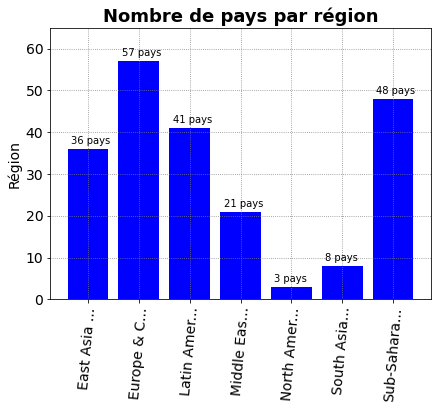

In [48]:
# code de pays et région associée

fig = plt.figure(figsize = (15,5))

df2 = cntry1[['Country Name', 'Region']].groupby('Region').count()
li_region = list(df2.index)
x = li_region
xlab = [my_str[:10]+"..." if len(my_str)>8 else my_str for my_str in x]
y1 = df2.values.reshape(len(df2.values),)
#y2 = 

# Nombre de pays par région
plot1 = plt.subplot(1,2,1)
basic_plot("bar", plot1, xlab, y1, xlab, "", "Région",  "Nombre de pays par région", 5)
labels = [ '{:.0f} pays'.format(y1[i]) for i in range(len(y1))] 
for label,xlab, y1 in zip(labels, xlab, y1):
    plt.annotate(label, xy=(xlab, y1), xytext=(-17, 3),
        textcoords='offset points', ha='left', va='bottom' )
plt.ylim(0,65)
plt.show()

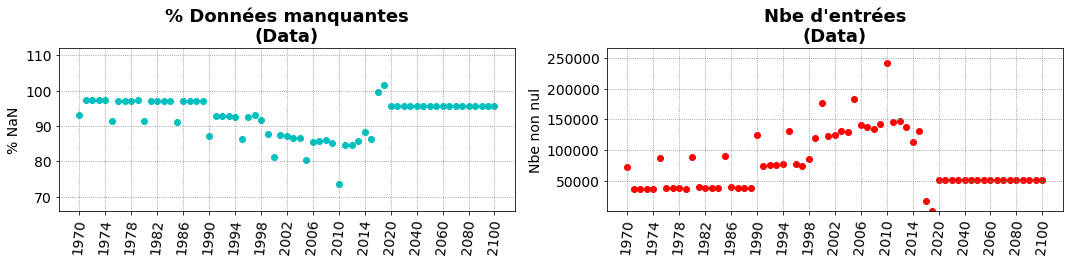

In [50]:
fig = plt.figure(figsize = (18,3))

li_annees = info_data.columns[4:]
x=li_annees
xlab=[my_str[:11]+"..." if len(my_str)>11 else my_str for my_str in x]
y1=info_data[li_annees].loc["null"]*100/dta1.shape[0] # % de valeurs nulles
y2=info_data[li_annees].loc["count"] # nombre de valeurs

plot1 = plt.subplot(1,2,1)
basic_plot("scatter", plot1, xlab, y1, xlab[::4], "", "% NaN",  "% Données manquantes\n(Data)", 0)

plot2 = plt.subplot(1,2,2)
basic_plot("scatter", plot2, xlab, y2, xlab[::4], "", "Nbe non nul",  "Nbe d'entrées\n(Data)", 1)

*texte en italique*

In [51]:
# nbe de remplissage minimum/maximum et année correspondante
sel_data = info_data.loc["count"][4:]
val_min = sel_data.min()
val_max = sel_data.max()

print("- année nbe entrées min, nbe entrées min : \n{}, \n{:.0f}, soit {:.3f}%"\
      .format(sel_data.index[sel_data==val_min], \
              val_min, val_min*100/(dta.shape[0])))

print("- année nbe entrées max, nbe entrées max : \n{}, \n{:.0f}, soit {:.3f}%"\
     .format(sel_data.index[sel_data==val_max], \
             val_max, val_max*100/(dta.shape[0])))

- année nbe entrées min, nbe entrées min : 
Index(['2017'], dtype='object'), 
143, soit 0.016%
- année nbe entrées max, nbe entrées max : 
Index(['2010'], dtype='object'), 
242442, soit 27.335%


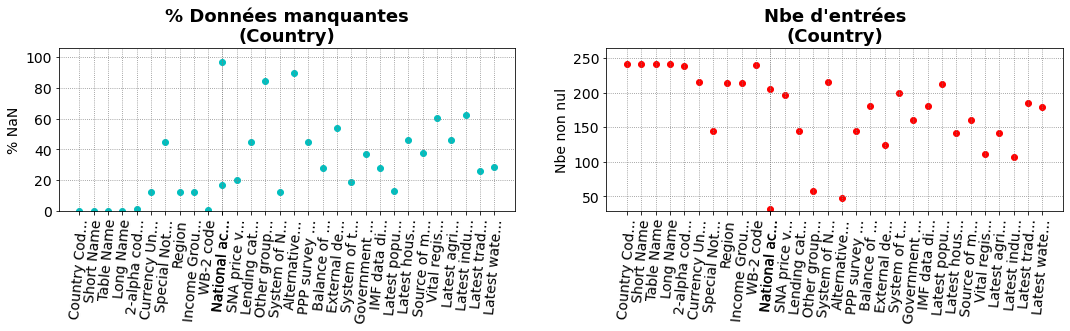

In [53]:
fig = plt.figure(figsize = (18,3))

x=info_country.columns
xlab=[my_str[:11]+"..." if len(my_str)>11 else my_str for my_str in x]
y1=info_country.loc["null"]*100/country.shape[0]  # % de valeurs nulles
y2=info_country.loc["count"] # nombre de valeurs

plot1 = plt.subplot(1,2,1)
basic_plot("scatter", plot1, xlab, y1, xlab, "", "% NaN",  "% Données manquantes\n(Country)", 0)

plot2 = plt.subplot(1,2,2)
basic_plot("scatter", plot2, xlab, y2, xlab, "", "Nbe non nul",  "Nbe d'entrées\n(Country)", 1)

plt.show()

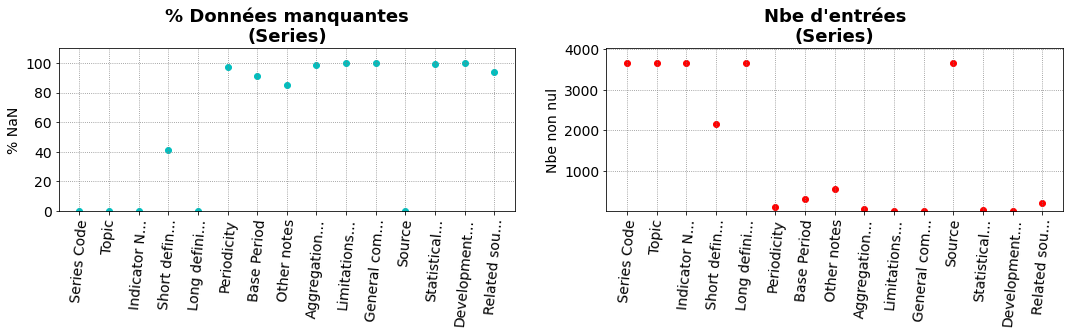

In [54]:
fig = plt.figure(figsize = (18,3))

x=info_series.columns
xlab=[my_str[:11]+"..." if len(my_str)>11 else my_str for my_str in x]
y1=info_series.loc["null"]*100/series.shape[0]  # % de valeurs nulles
y2=info_series.loc["count"] # nombre de valeurs

plot1 = plt.subplot(1,2,1)
basic_plot("scatter", plot1, xlab, y1, xlab, "", "% NaN",  "% Données manquantes\n(Series)", 0)

plot2 = plt.subplot(1,2,2)
basic_plot("scatter", plot2, xlab, y2, xlab, "", "Nbe non nul",  "Nbe d'entrées\n(Series)", 1)

plt.show()

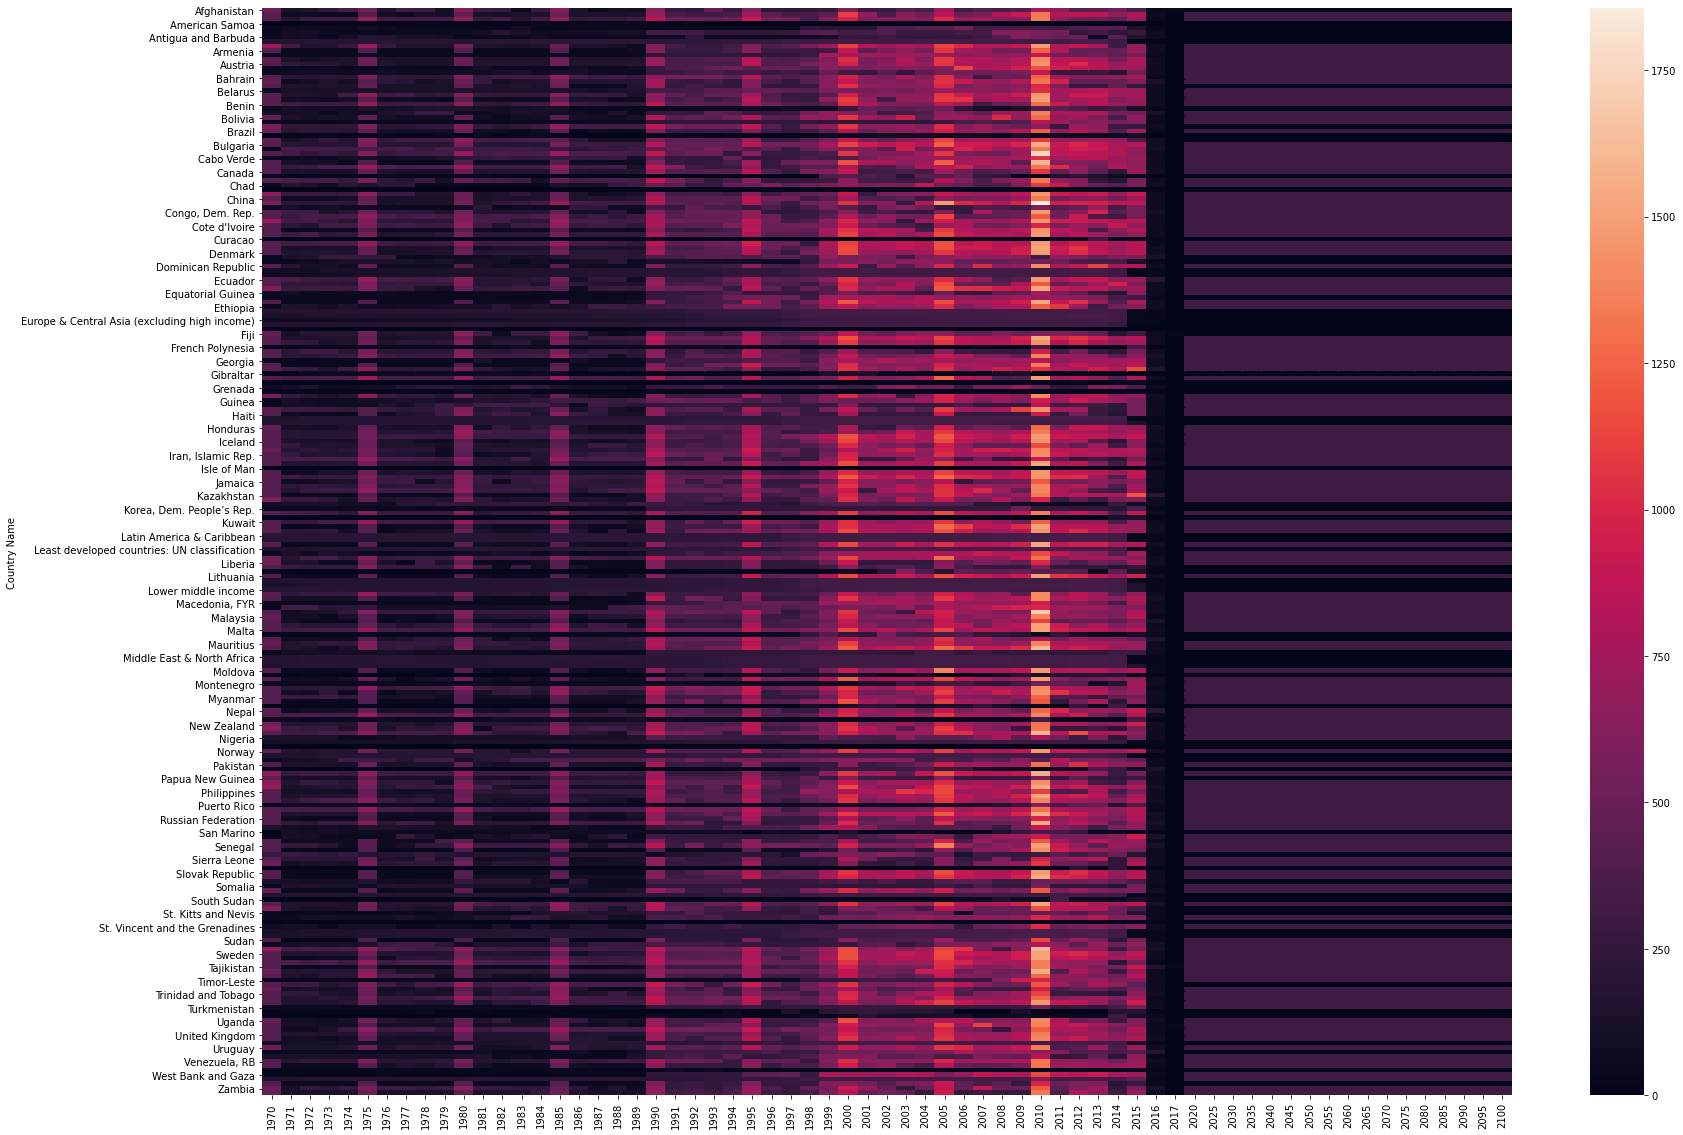

In [52]:
# Heatmap du nombre d'indicateurs non nuls (pays/années)

nb_ind_cnt = dta1.groupby(['Country Name']).count()[li_annees]

# Tableau des nombres d'indicateurs dispo pour chaque pays et chaque année 
fig = plt.figure(figsize = (28,20))
heat_map = sns.heatmap(nb_ind_cnt)

Certains pays ont peu d'indicateurs, quelles que soient les années considérées (lignes sombres).
Certaines années sont mieux renseignées (années multiples de 5)

> **On distingue plusieurs plages de temps:**

*   [1970:1989] : peu renseigné
*   [1990:1999] : assez bien renseigné
*   [2000:2015] : bien renseigné
*   [2016:2100] : quasiment pas renseigné


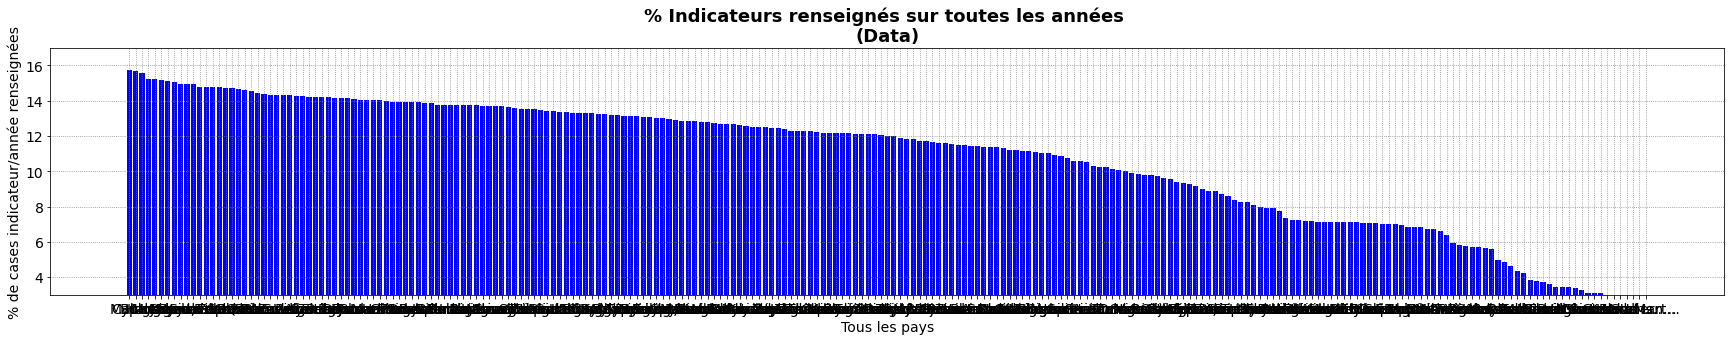

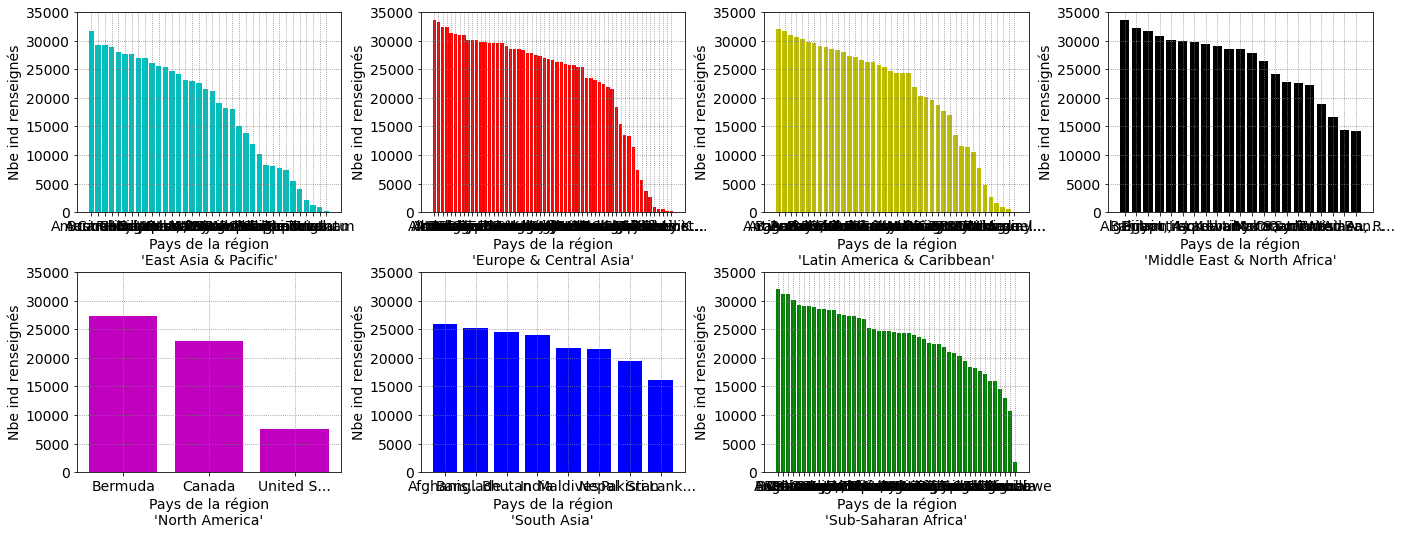

In [56]:
# tableau du pourcentage d'indicateurs renseignés par pays ()

fig1 = plt.figure(figsize = (30,10))
gp = dta1.groupby(['Country Name']).count()
nb_col_an = dta1[4:].shape[1]
nb_indic = series1['Indicator Code'].shape[0]
nb_max = (nb_col_an*nb_indic)
tab = gp[gp.columns[3:]].sum(axis=1)*100/nb_max
tab.sort_values(ascending=False,inplace=True)

x=tab.index
xlab=[my_str[:8]+"..." if len(my_str)>8 else my_str for my_str in x]
y=tab
plot1 = plt.subplot(2,1,1)
basic_plot("bar", plot1, xlab, y, '', "Tous les pays", "% de cases indicateur/année renseignées",  "% Indicateurs renseignés sur toutes les années \n(Data)", 5)
plt.show()

# tableau du pourcentage d'indicateurs renseignés par pays et par région ()

fig2 = plt.figure(figsize = (30,10))
tab_df = [dta1.groupby(['Region', 'Country Name']).count().loc[reg][li_annees] for reg in li_region]
n = 4 # nombre de colonnes d'affichage en largeur
tab_plot = []
for i in range(len(tab_df)):
    x=tab_df[i].index
    xlab=[my_str[:8]+"..." if len(my_str)>8 else my_str for my_str in x]
    y=tab_df[i].sum(axis=1) # nombre d'indicateurs renseignés
    y.sort_values(ascending=False,inplace=True)
    tab_plot.append(plt.subplot((len(tab_df)+1)//n+1,n,i+1))
    basic_plot("bar", tab_plot[i], xlab, y, '', "Pays de la région\n'"+ li_region[i] + "'", "Nbe ind renseignés",  "", i)
    plt.ylim(0,35000)
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.2, right = 0.7, top = 1.2, wspace = 0.3, hspace = 0.3)
plt.show()

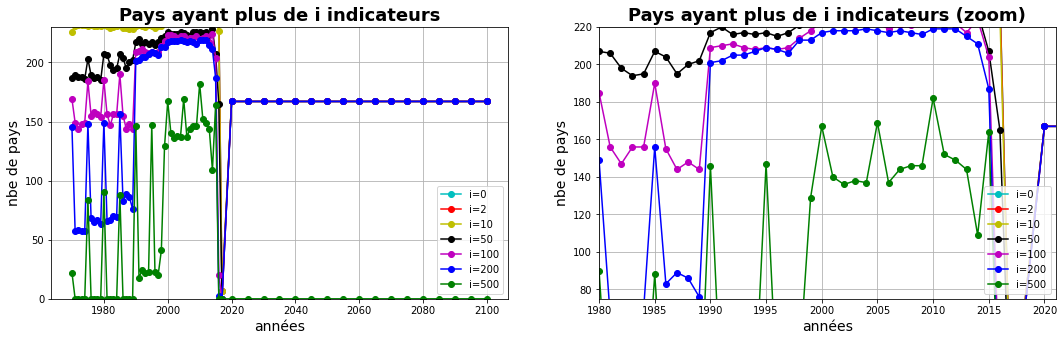

In [66]:
# Nbe de pays ayant un nombre d'indicateurs supérieur à n en fonction des années

nb_ind_cnt = dta1.groupby(['Country Name']).count()[li_annees]

def calc_nb_pay_rens (tab_n, years): # prend un tableau de seuils entiers et un tableau d'années
    tab = [ [nb_ind_cnt[nb_ind_cnt[str(i)]>j].index.size for i in years] for j in tab_n ]
    res = np.array(tab).T
    return res

fig = plt.figure(figsize = (18,5))

countrys = [nb_ind_cnt.index[i][0] + " - " + nb_ind_cnt.index[i][1] for i in range(nb_ind_cnt.index.size)]
tab_n = [0,2,10,50,100, 200, 500]
x =  [int(y) for y in li_annees]
y = calc_nb_pay_rens(tab_n,x)
colors = ["c","r","y","k","m","b","g"]
labels = ["i="+str(i) for i in tab_n]

plot1 = plt.subplot(1,2,1)
[plot1.plot(x, y[:,i], '-o', label = labels[i], color = colors[i]) for i in range(len(tab_n))]
plot1.set_ylim(0,230)
plot1.set_xlabel("années", fontsize = 14), plot1.set_ylabel("nbe de pays", fontsize = 14)
plot1.set_title("Pays ayant plus de i indicateurs", fontsize = 18, fontweight = 'bold')
plot1.legend(loc = 'lower right'), plt.grid()

plot2 = plt.subplot(1,2,2)
[plot2.plot(x, y[:,i], '-o', label = labels[i], color = colors[i]) for i in range(len(tab_n))]
plot2.set_xlim(1980,2021), plot2.set_ylim(75,220)
plot2.set_xlabel("années", fontsize = 14), plot2.set_ylabel("nbe de pays", fontsize = 14)
plot2.set_title("Pays ayant plus de i indicateurs (zoom)", fontsize = 18, fontweight = 'bold')
plot2.legend(loc = 'lower right'), plt.grid()
plt.show()


*   Plus de la moitié des pays ont plus de 500 indicateurs remplis pour chaque année à partir de 2000.
*   Plus de 80% des pays ont plus de 200 indicateurs remplis chaque année à partir de 2000.
*   167 pays ont des projections d'indicateurs (entre 200 et 500)
*   Tous les pays ont au moins 1 indicateur


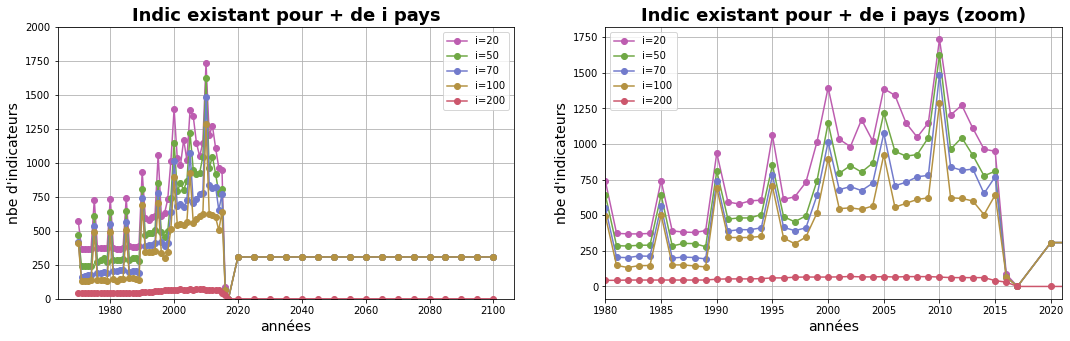

In [67]:
# Nbe d'indicateurs existant pour plus de n pays selon les années

nb_pay_cnt = dta1.groupby(['Indicator Name']).count()[li_annees]

def calc_nb_ind_rens (tab_n, years): # prend un tableau de seuils entiers et un tableau d'années
    tab = [ [nb_pay_cnt[nb_pay_cnt[str(i)]>j].index.size for i in years] for j in tab_n ]
    res = np.array(tab).T
    return res

fig = plt.figure(figsize = (18,5))

countrys = [nb_ind_cnt.index[i][0] + " - " + nb_ind_cnt.index[i][1] for i in range(nb_ind_cnt.index.size)]
tab_n = [20,50,70,100, 200]
x =  [int(y) for y in li_annees] # liste des anneés
y = calc_nb_ind_rens(tab_n,x)
colors = ["#bd5db0","#70a845","#727bcc","#b49242","#cc566c","#4aad92","#ca6037"]
labels = ["i="+str(i) for i in tab_n]

plot1 = plt.subplot(1,2,1)
[plot1.plot(x, y[:,i], '-o', label = labels[i], color = colors[i]) for i in range(len(tab_n))]
plot1.set_ylim(0,2000)
plot1.set_xlabel("années", fontsize = 14), plot1.set_ylabel("nbe d'indicateurs", fontsize = 14)
plot1.set_title("Indic existant pour + de i pays", fontsize = 18, fontweight = 'bold')
plot1.legend(loc = 'upper right'), plt.grid()

plot2 = plt.subplot(1,2,2)
[plot2.plot(x, y[:,i], '-o', label = labels[i], color = colors[i]) for i in range(len(tab_n))]
plot2.set_xlim(1980,2021), #plot2.set_ylim(75,220)
plot2.set_xlabel("années", fontsize = 14), plot2.set_ylabel("nbe d'indicateurs", fontsize = 14)
plot2.set_title("Indic existant pour + de i pays (zoom)", fontsize = 18, fontweight = 'bold')
plot2.legend(loc = 'upper left'), plt.grid()
plt.show()



*   Environ 500 indicateurs sont renseignés chaque année pour plus de 100 pays (la moitié des pays) de 2000 à 2015.
*   Seuls 20 pays environ ont plus de 1000 indicateurs renseignés chaque année
*   167 pays sur les 214 (voir graphes précédents) ont des projections pour 308 indicateurs sur les 3665.

Les annees 2010s semblent etre les ceux qui sont les plus remplies indicateurs/pays

In [69]:
dta1['Indicator Name'].unique()

array(['Adjusted net enrolment rate, lower secondary, both sexes (%)',
       'Adjusted net enrolment rate, lower secondary, female (%)',
       'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
       ..., 'Youth literacy rate, population 15-24 years, female (%)',
       'Youth literacy rate, population 15-24 years, gender parity index (GPI)',
       'Youth literacy rate, population 15-24 years, male (%)'],
      dtype=object)

In [80]:
def description_indicateurs(dta, indicateurs, groupe):
    df_per_indicator = pd.DataFrame()
    for indicateur in indicateurs:
        df_temp = df[df['Indicator Code'] == indicateur]
        df_temp[indicateur] = df['2010s']
        df_temp.drop(['2010s', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
   
        if df_per_indicator.empty is False:
            df_per_indicator = df_per_indicator.merge(right = df_temp, how = 'outer', on = ['Country Code', 'Country Name', 'Region']).sort_values(by='Country Name')
        else:
            df_per_indicator = df_temp
            
            
    description = df_per_indicator.groupby([groupe])[indicateurs].describe(percentiles = [0.5])
    for indicateur in indicateurs:
        description[(indicateur, 'sum')] = description[(indicateur, 'count')] * description[(indicateur, 'mean')]
    colonnes = []
    for indicateur in indicateurs:
        for stat in ['mean', 'std', '50%', 'sum'] :
            colonnes += [(indicateur, stat)]
    description = description[colonnes]
    description.reset_index(inplace=True)
    return description, df_per_indicator

In [81]:
indicateurs = ['UIS.E.4',
              'UIS.E.3',
              'SE.TER.ENRL',
              'UIS.X.USCONST.3.FSGOV',
              'SP.POP.TOTL',
              'SP.POP.1524.TO.UN',
              'IT.NET.USER.P2',
              'IT.CMP.PCMP.P2']

In [82]:
dta1[dta1['Indicator Code'].isin(indicateurs)][['Indicator Name', 'Indicator Code', '2010s']].groupby(['Indicator Name', 'Indicator Code']).count().reset_index().sort_values(by='2010s',ascending=False)

,Indicator Name,Indicator Code,2010s
6,"Population, total",SP.POP.TOTL,240
3,Internet users (per 100 people),IT.NET.USER.P2,229
2,"Enrolment in upper secondary education, both s...",UIS.E.3,206
1,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,197
5,"Population, ages 15-24, total",SP.POP.1524.TO.UN,181
0,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,137
4,Personal computers (per 100 people),IT.CMP.PCMP.P2,0
